In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('winequality_red_cleaned.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df.drop_duplicates(inplace=True)   

In [10]:
df.shape

(1359, 12)

In [11]:
corr=df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


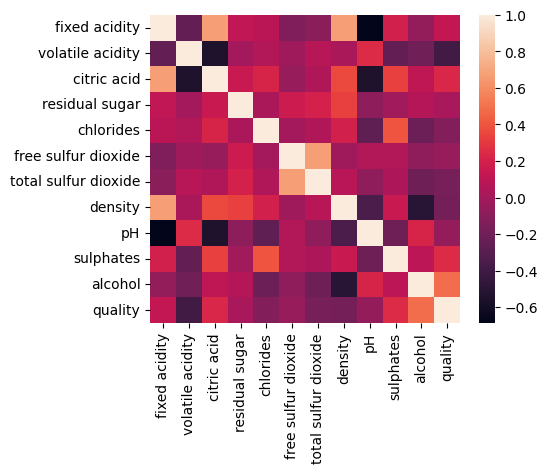

In [12]:
plt.figure(figsize=(5,4))
sns.heatmap(corr)  
plt.show()

In [13]:
df["quality"].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [14]:
x=df.drop("quality",axis=1)
y=df["quality"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

model=DecisionTreeClassifier()
model.fit(x_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.47975880212431155, 0.9722222222222222, 'alcohol <= 10.25\ngini = 0.648\nsamples = 1087\nvalue = [6.0, 42.0, 457.0, 432.0, 136.0, 14.0]\nclass = 5'),
 Text(0.32478117623918173, 0.9166666666666666, 'total sulfur dioxide <= 98.5\ngini = 0.534\nsamples = 575\nvalue = [5.0, 26.0, 351.0, 173.0, 18.0, 2.0]\nclass = 5'),
 Text(0.4022699891817466, 0.9444444444444444, 'True  '),
 Text(0.20345692368214005, 0.8611111111111112, 'volatile acidity <= 0.548\ngini = 0.568\nsamples = 495\nvalue = [5, 25, 277, 168, 18, 2]\nclass = 5'),
 Text(0.08263670338316287, 0.8055555555555556, 'sulphates <= 0.585\ngini = 0.594\nsamples = 220\nvalue = [1.0, 7.0, 96.0, 101.0, 13.0, 2.0]\nclass = 6'),
 Text(0.02832415420928403, 0.75, 'alcohol <= 9.75\ngini = 0.516\nsamples = 73\nvalue = [0, 4, 44, 25, 0, 0]\nclass = 5'),
 Text(0.01888276947285602, 0.6944444444444444, 'density <= 0.997\ngini = 0.398\nsamples = 47\nvalue = [0, 2, 35, 10, 0, 0]\nclass = 5'),
 Text(0.012588512981904013, 0.6388888888888888, 'free su

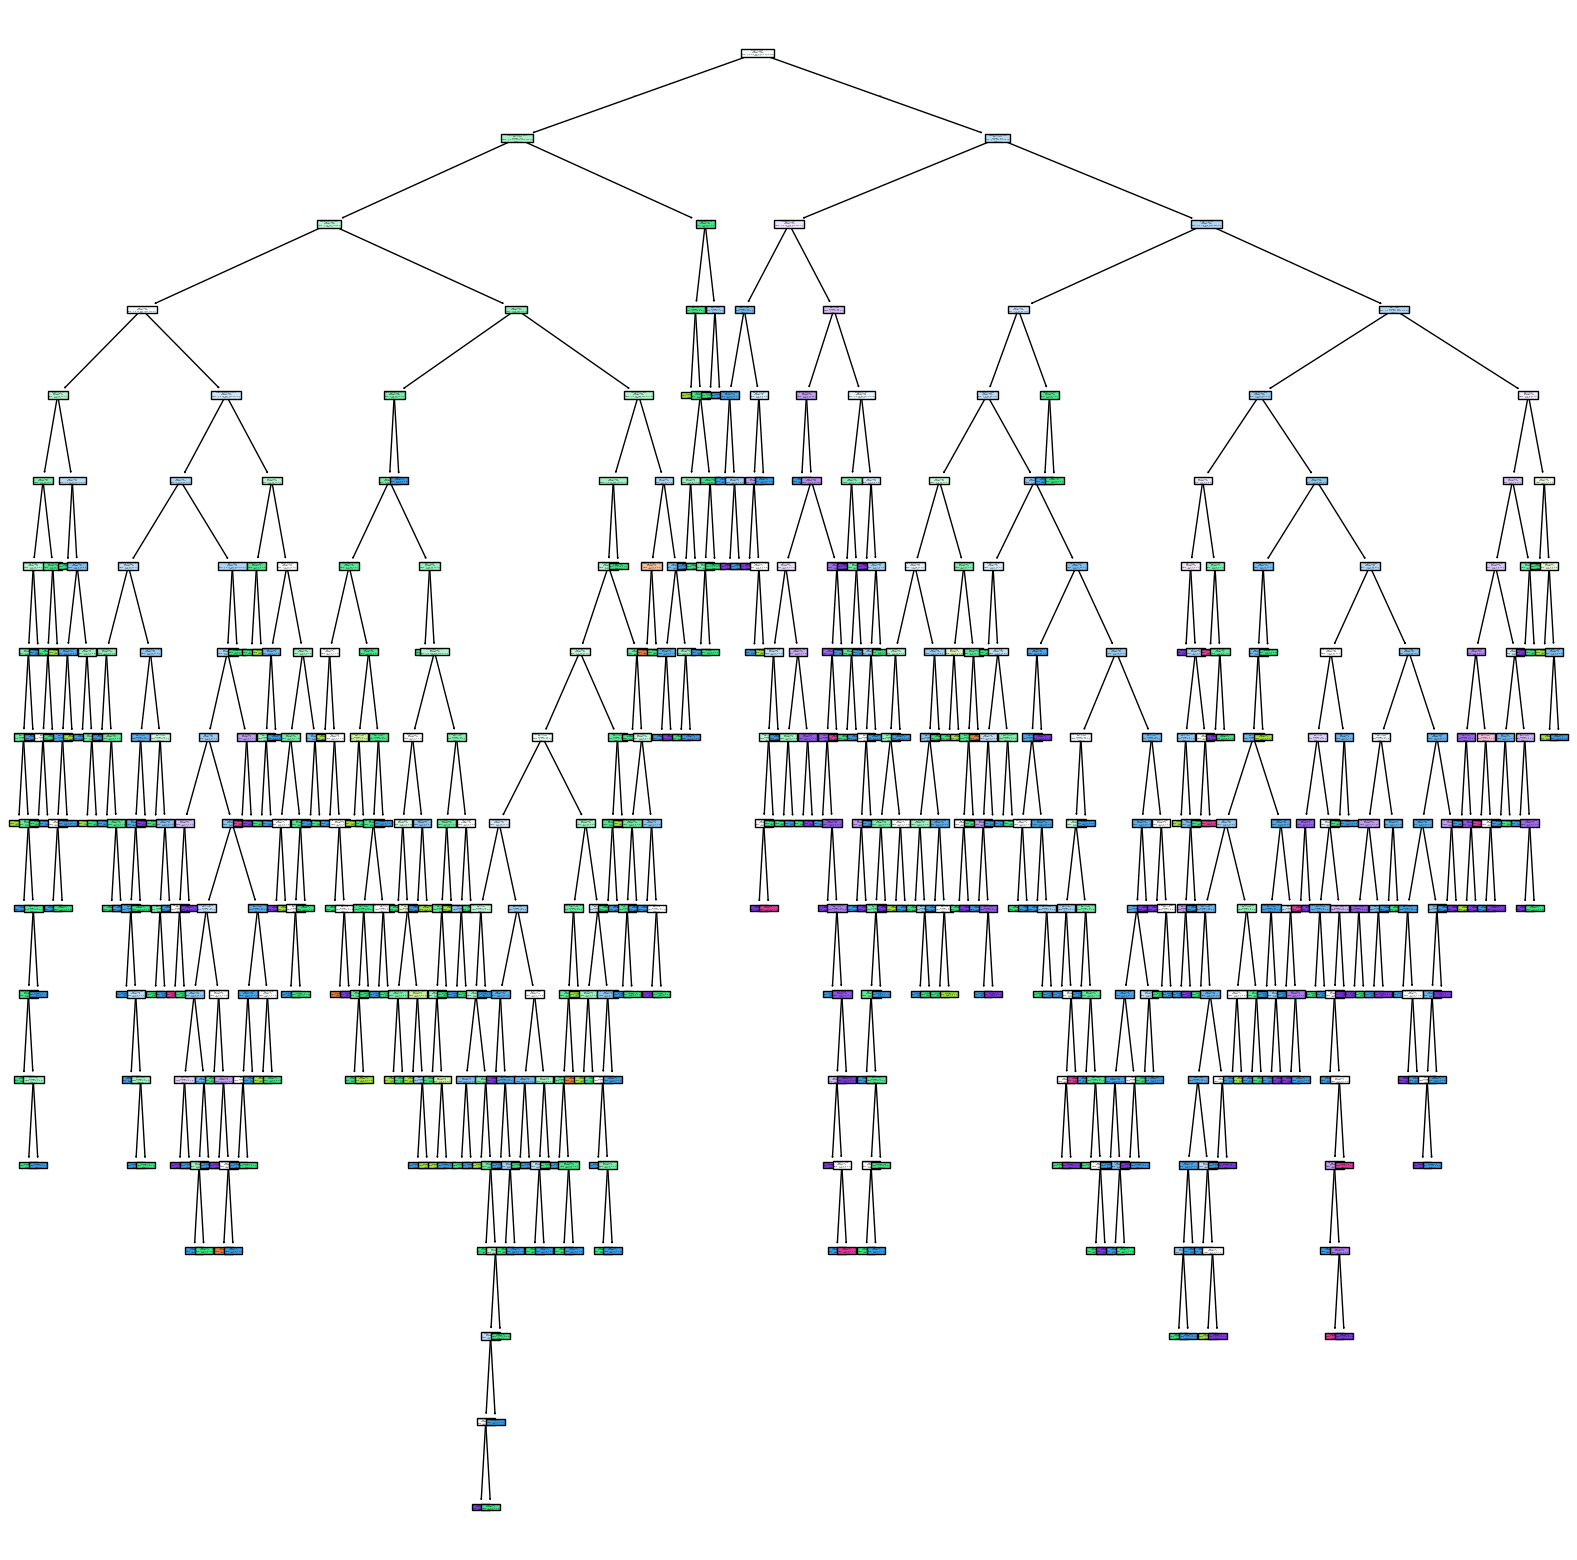

In [19]:
feature_names = list(x.columns)

plt.figure(figsize=(20,20))
tree.plot_tree(model, filled=True, class_names=[str(i) for i in set(y)], feature_names=feature_names)


In [21]:
df1=df.head(40)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


In [24]:
x1=df1.drop("quality",axis=1)
y1=df1["quality"]

In [26]:
d1_model=DecisionTreeClassifier()
d1_model.fit(x1,y1)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4230769230769231, 0.9285714285714286, 'free sulfur dioxide <= 8.5\ngini = 0.591\nsamples = 40\nvalue = [3, 23, 10, 4]\nclass = 5'),
 Text(0.15384615384615385, 0.7857142857142857, 'sulphates <= 0.525\ngini = 0.571\nsamples = 7\nvalue = [2, 1, 4, 0]\nclass = 6'),
 Text(0.28846153846153844, 0.8571428571428572, 'True  '),
 Text(0.07692307692307693, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]\nclass = 4'),
 Text(0.23076923076923078, 0.6428571428571429, 'citric acid <= 0.22\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4, 0]\nclass = 6'),
 Text(0.15384615384615385, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0]\nclass = 6'),
 Text(0.3076923076923077, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]\nclass = 5'),
 Text(0.6923076923076923, 0.7857142857142857, 'citric acid <= 0.42\ngini = 0.507\nsamples = 33\nvalue = [1, 22, 6, 4]\nclass = 5'),
 Text(0.5576923076923077, 0.8571428571428572, '  False'),
 Text(0.5384615384615384, 0.6428571428571429, 'chlorides <=

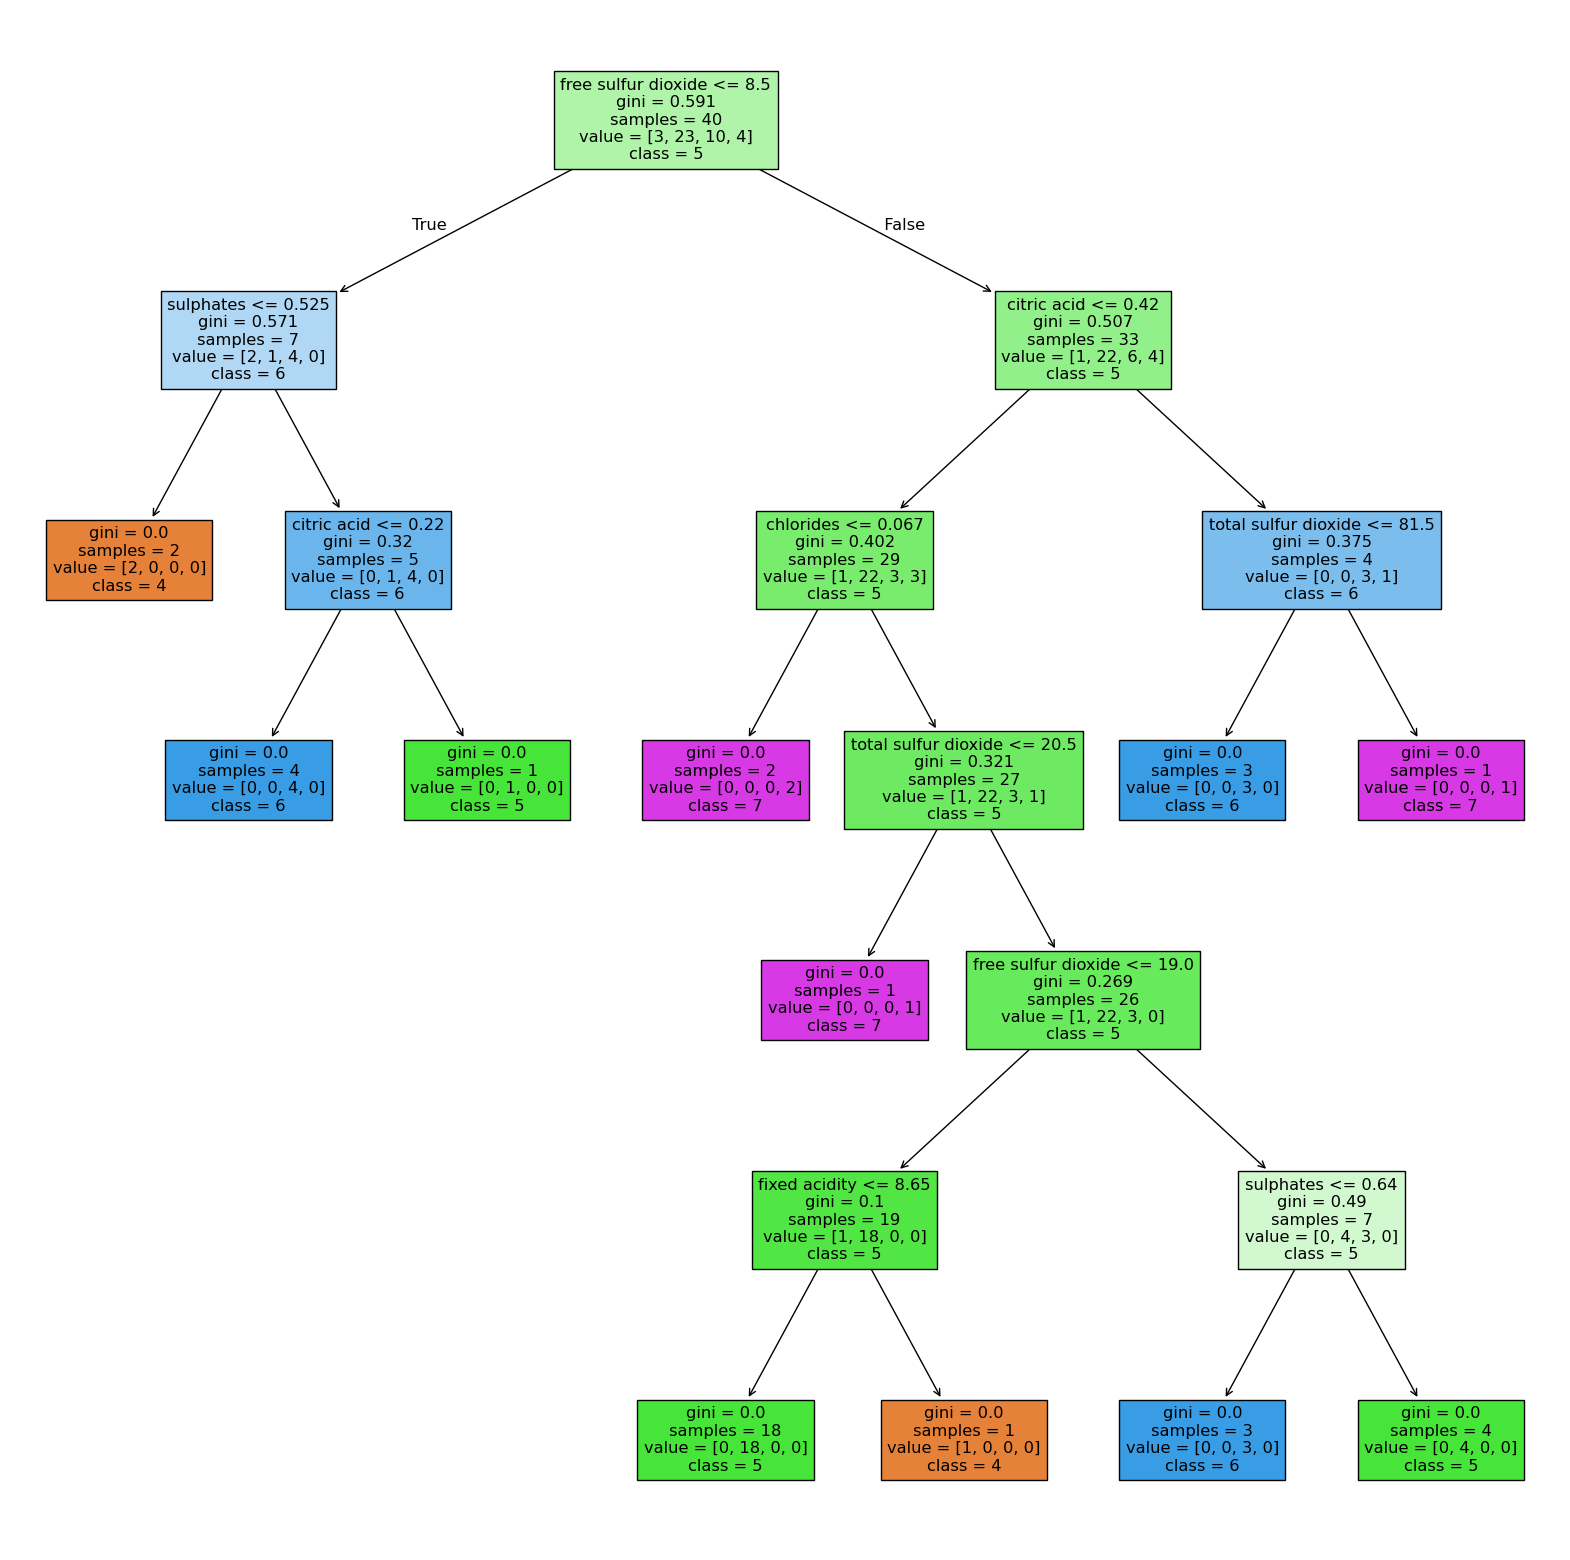

In [27]:
feature_names = list(x1.columns)

plt.figure(figsize=(20,20))
tree.plot_tree(d1_model, filled=True, class_names=[str(i) for i in set(y1)], feature_names=feature_names)

In [28]:
d1_model.score(x_train,y_train)

0.33946642134314625

In [29]:
d1_model.score(x_test,y_test)

0.2977941176470588

In [31]:
path = d1_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.        , 0.00081775, 0.00082797, 0.00083633, 0.0008433 ,
       0.0008433 , 0.0008492 , 0.00085182, 0.00085863, 0.00086247,
       0.00086477, 0.00086585, 0.00086885, 0.00087397, 0.00087616,
       0.00089121, 0.00090192, 0.00090682, 0.00091996, 0.00091996,
       0.00091996, 0.00091996, 0.00091996, 0.00091996, 0.00091996,
       0.00091996, 0.00091996, 0.00091996, 0.00091996, 0.00091996,
       0.00091996, 0.00091996, 0.00091996, 0.00091996, 0.00091996,
       0.00110396, 0.00116553, 0.00117121, 0.00117755, 0.00120303,
       0.00120745, 0.00122662, 0.00122662, 0.00122662, 0.00122662,
       0.00122662, 0.00122662, 0.00122662, 0.00122662, 0.00122662,
       0.00122662, 0.00122662, 0.00122662, 0.00122662, 0.00122662,
       0.00122662, 0.00128795, 0.00128795, 0.00132519, 0.00135804,
       0.00137994, 0.00137994, 0.00137994, 0.00137994, 0.00137994,
       0.00137994, 0.00137994, 0.00137994, 0.00137994, 0.00137994,
       0.00137994, 0.00137994, 0.001385  , 0.00139528, 0.00141

In [33]:
d1_model1= []
for ccp in ccp_alpha:
    dt_m  = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x_train,y_train)
    d1_model1.append(dt_m)

In [34]:
d1_model1

[DecisionTreeClassifier(ccp_alpha=np.float64(0.0)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008177450679750588)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008279668813247472)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008363301831563101)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008432996013492794)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008432996013492794)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008491968013587145)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008518177791406863)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008586323213738119)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008624655013799448)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008647654093836245)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008658477190324154)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008688541347235001)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008739650413983438)),
 DecisionTreeClassifier(ccp_alpha=np.f

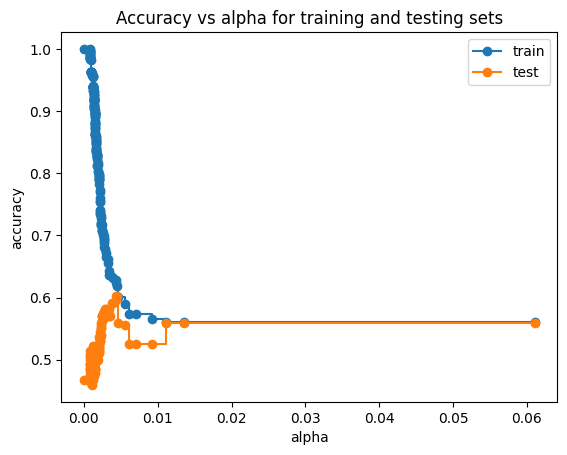

In [36]:
fig, ax = plt.subplots()
train_scores = [m.score(x_train, y_train) for m in d1_model1]
test_scores = [m.score(x_test, y_test) for m in d1_model1]
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alpha, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [37]:
d1_model_ccp = DecisionTreeClassifier(random_state=0 , ccp_alpha=0.01)
d1_model_ccp.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.6666666666666666, 0.875, 'x[10] <= 10.25\ngini = 0.648\nsamples = 1087\nvalue = [6.0, 42.0, 457.0, 432.0, 136.0, 14.0]'),
 Text(0.5, 0.625, 'x[6] <= 98.5\ngini = 0.534\nsamples = 575\nvalue = [5.0, 26.0, 351.0, 173.0, 18.0, 2.0]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[1] <= 0.548\ngini = 0.568\nsamples = 495\nvalue = [5, 25, 277, 168, 18, 2]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.594\nsamples = 220\nvalue = [1.0, 7.0, 96.0, 101.0, 13.0, 2.0]'),
 Text(0.5, 0.125, 'gini = 0.503\nsamples = 275\nvalue = [4, 18, 181, 67, 5, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.14\nsamples = 80\nvalue = [0, 1, 74, 5, 0, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.647\nsamples = 512\nvalue = [1, 16, 106, 259, 118, 12]'),
 Text(0.75, 0.75, '  False')]

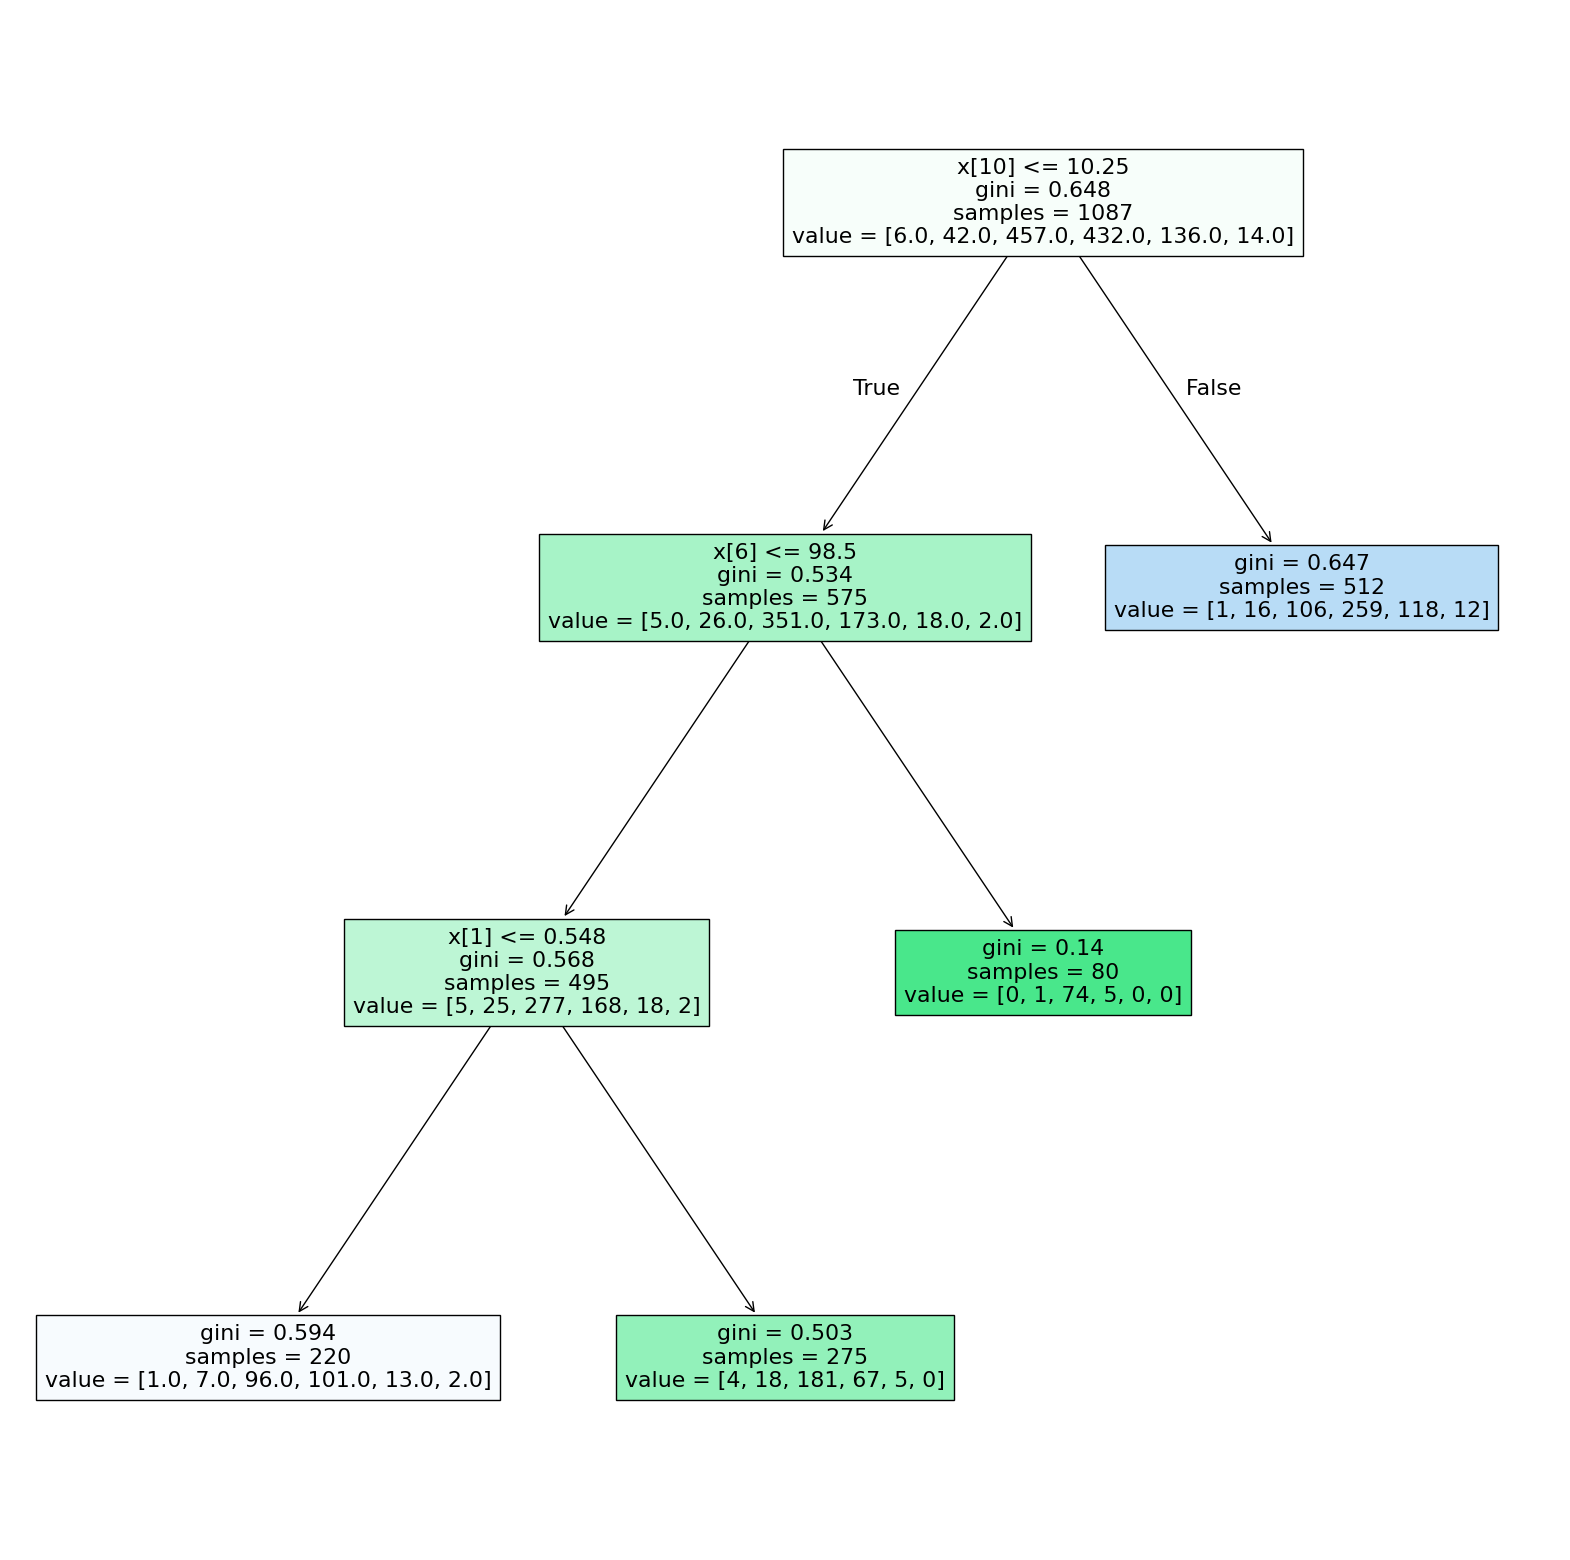

In [39]:
plt.figure(figsize=(20,20))
tree.plot_tree(d1_model_ccp,filled=True)

In [41]:
d1_model_ccp.score(x_train,y_train)

0.5657773689052438

In [42]:
d1_model_ccp.score(x_test,y_test)

0.5257352941176471

In [46]:
y_pred_train=d1_model_ccp.predict(x_train)
y_pred_test=d1_model_ccp.predict(x_test)

In [47]:
con_mat=confusion_matrix(y_test,d1_model_ccp.predict(x_test))
con_mat

array([[ 0,  0,  2,  2,  0,  0],
       [ 0,  0,  2,  9,  0,  0],
       [ 0,  0, 58, 62,  0,  0],
       [ 0,  0, 18, 85,  0,  0],
       [ 0,  0,  1, 30,  0,  0],
       [ 0,  0,  0,  3,  0,  0]])

In [48]:
report_test = classification_report(y_test,y_pred_test)
print(report_test)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.72      0.48      0.58       120
           6       0.45      0.83      0.58       103
           7       0.00      0.00      0.00        31
           8       0.00      0.00      0.00         3

    accuracy                           0.53       272
   macro avg       0.19      0.22      0.19       272
weighted avg       0.48      0.53      0.47       272



In [54]:
model_filename = 'wine_quality_model.pkl'
joblib.dump(d1_model_ccp, model_filename)

['wine_quality_model.pkl']